In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
from decimal import 
DecimalDecimal('0.2')+Decimal('0.1')==Decimal('0.3')

SyntaxError: ignored

5


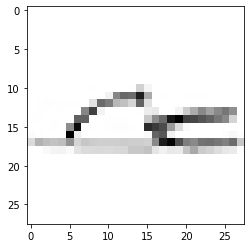

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

#model = Sequential()
#model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten()) 
#model.add(Dense(128, activation=tf.nn.relu))
#model.add(Dropout(0.2))
#model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28, 28, 1), 
                 padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3, 3), 
                 padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3),
                 padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3),
                 padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(Dropout(0.5))

model.add(Dense(256, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(Dropout(0.5))

model.add(Dense(10, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 503s 8ms/step - loss: 0.6817 - accuracy: 0.7912
Epoch 2/10
60000/60000 [==============================] - 503s 8ms/step - loss: 0.3781 - accuracy: 0.8678
Epoch 3/10
60000/60000 [==============================] - 503s 8ms/step - loss: 0.3301 - accuracy: 0.8861
Epoch 4/10
60000/60000 [==============================] - 502s 8ms/step - loss: 0.3023 - accuracy: 0.8972
Epoch 5/10
60000/60000 [==============================] - 503s 8ms/step - loss: 0.2801 - accuracy: 0.9051
Epoch 6/10
60000/60000 [==============================] - 504s 8ms/step - loss: 0.2620 - accuracy: 0.9107
Epoch 7/10
60000/60000 [==============================] - 504s 8ms/step - loss: 0.2510 - accuracy: 0.9150
Epoch 8/10
60000/60000 [==============================] - 506s 8ms/step - loss: 0.2311 - accuracy: 0.9213
Epoch 9/10
60000/60000 [==============================] - 505s 8ms/step - loss: 0.2203 - accuracy: 0.9243
Epoch 10/10
60000/60000 [=====================

In [ ]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 25s 2ms/step


[0.26011223246455195, 0.9128000140190125]

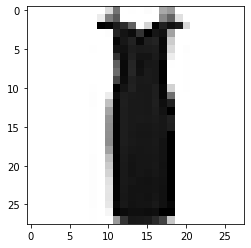

In [ ]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')


In [ ]:
pred = model.predict(x_test[image_index].reshape(1, 28,28, 1))
print(pred.argmax())

3


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,accuracy_score
import numpy as np
y_pred1 = model.predict(x_test)
y_pred = np.argmax(y_pred1, axis=1)




In [ ]:

print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))
print(accuracy_score(y_test, y_pred))

0.9184718916627344
0.9127999999999998
0.9118185119192483
0.9128
